In [1]:
import pandas as pd
import numpy as np

How many members' books are in the dataset?

In [2]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
134,https://shakespeareandco.princeton.edu/books/b...,Agnes Grey,"Brontë, Anne",NaN,NaN,NaN,NaN,NaN,1847,Book,False,https://archive.org/details/agnesgrey00brongoo...,NaN,NaN,3,3,0,1939;1941;1926,2020-05-14T23:02:45+00:00
3791,https://shakespeareandco.princeton.edu/books/e...,Essays Ancient and Modern,"Eliot, T. S.",NaN,NaN,NaN,NaN,NaN,1932,Book,False,https://archive.org/details/dli.ernet.509705,NaN,NaN,3,3,0,1936;1938,2021-06-05T15:18:48+00:00
255,https://shakespeareandco.princeton.edu/books/e...,The Brownies and Other Tales,"Ewing, Juliana Horatia",NaN,NaN,NaN,NaN,NaN,1870,Book,False,https://archive.org/details/browniesothertal10...,NaN,NaN,1,0,0,1961,2020-07-17T13:09:22+00:00
4887,https://shakespeareandco.princeton.edu/books/b...,The Mortal Storm,"Bottome, Phyllis",NaN,NaN,NaN,NaN,NaN,1937,Book,False,NaN,NaN,NaN,6,6,0,1937;1939;1941;1947;1948,2020-04-30T19:40:21+00:00
5989,https://shakespeareandco.princeton.edu/books/w...,Walter Scott,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True,NaN,NaN,Unidentified. By or about Sir Walter Scott.,1,1,0,1939,2021-11-15T23:01:12.500454+00:00


In [3]:
sco_members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_members.sample(6)

,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
1184,https://shakespeareandco.princeton.edu/members...,Miss Daws,"Daws, Miss",Miss,Female,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"61 bis rue Notre Dame des Champs, Paris",75006,6,"48.84381, 2.33108","The Shakespeare and Company <a href=""https://s...",2021-10-28T13:10:00.115639+00:00
4404,https://shakespeareandco.princeton.edu/members...,R. Simpson,"Simpson, R.",Mr.,Male,False,False,NaN,NaN,1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-28T03:31:48+00:00
4501,https://shakespeareandco.princeton.edu/members...,Mme Souvtchinsky / Mme Soutchinsky / Mme Soutv...,"Souvtchinsky, Mme",Mme,Female,False,False,NaN,NaN,1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-02T18:24:58+00:00
1152,https://shakespeareandco.princeton.edu/members...,Miss Dauchy,"Dauchy, Miss",Miss,Female,False,False,NaN,NaN,1925;1926,NaN,NaN,NaN,"Hôtel Malherbe, 11 rue de Vaugirard, Paris;11 ...",75006;75006,6;6,"48.84896, 2.33962;48.84896, 2.33962",NaN,2020-02-22T19:08:52+00:00
1638,https://shakespeareandco.princeton.edu/members...,Mrs. Thomas Farrar,"Farrar, Mrs. Thomas",Mrs.,Female,False,True,NaN,NaN,1937,NaN,NaN,NaN,"Hôtel Paris-Dinard, 29 rue Cassette, Paris",75006,6,"48.84864, 2.33113",NaN,2020-09-05T16:49:43+00:00
2507,https://shakespeareandco.princeton.edu/members...,Mrs. Jaffe,"Jaffe, Mrs.",Mrs.,Female,False,False,NaN,NaN,1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs. Jaffe shared a lending library membership...,2021-09-18T21:26:55.671363+00:00


In [4]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
sco_books_aut.shape

(3512, 4)

In [5]:
sco_members_aut = sco_members[['sort_name']].dropna()

sco_members_aut.shape

(5235, 1)

In [6]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

(1453, 4)

In [7]:
sco_books_aut_unique.sample(10)

,sco_author,title,format,year
4399,"Rylee, Robert",Deep Dark River,Book,1935
1892,"Campbell, Mrs. Patrick",My Life and Some Letters,Book,1922
2759,"Bromfield, Louis",A Good Woman,Book,1927
2758,"Tourrier, Theodore",A Chinaman's Opinion of Us and of His Own Country,Book,1927
4625,"Campbell, Victor",Marching Minstrel,Book,1936
2193,"Romains, Jules",Eyeless Sight: A Study of Exra-Retinal Vision ...,Book,1924
3937,"Lumpkin, Grace",To Make My Bread,Book,1932
1865,"Molnár, Ferenc","Fashions for Men, and The Swan: Two Plays",Book,1922
1747,"Yeats, William Butler",Four Plays for Dancers,Book,1921
3280,"Boas, Frederick S.",Marlowe and His Circle,Book,1929


In [8]:
sco_members_aut.rename(columns={'author': 'sco_member'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)

merged_df = pd.merge(sco_members_aut, sco_books_aut_unique, how='outer', left_on='sort_name', right_on='sco_author')

intersection_df = merged_df.dropna(subset=['sort_name', 'sco_author'])

intersection_df.reset_index(drop=True, inplace=True) # to avoid confusion later on
intersection_df = intersection_df[['sco_author','sort_name']]

intersection_df

C:\Users\dittm\AppData\Local\Temp\ipykernel_5168\2495752277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)


,sco_author,sort_name
0,"Aldington, Richard","Aldington, Richard"
1,"Anderson, Margaret C.","Anderson, Margaret C."
2,"Antheil, George","Antheil, George"
3,"Aragon, Louis","Aragon, Louis"
4,"Asch, Nathan","Asch, Nathan"
...,...,...
74,"Wescott, Glenway","Wescott, Glenway"
75,"Wilder, Thornton","Wilder, Thornton"
76,"Wilson, Margaret","Wilson, Margaret"
77,"Wilson, Romer","Wilson, Romer"


In [9]:
intersection_df_shape = intersection_df.shape[0]
print("Number of writers whose books were available:", intersection_df_shape)

Number of writers whose books were available: 79


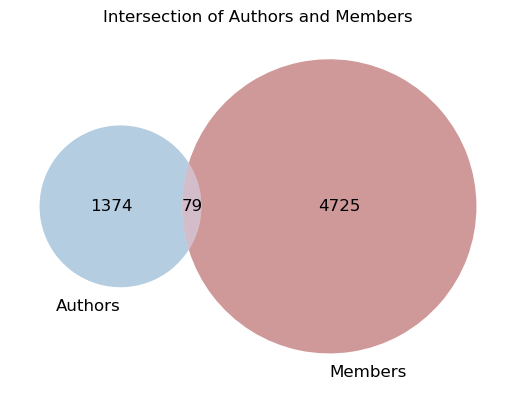

In [25]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Extract unique authors and members
unique_authors = set(sco_books_aut_unique['sco_author'])
unique_members = set(sco_members_aut['sort_name'])

# Calculate the intersection
intersection = len(unique_authors.intersection(unique_members))

# Create the Venn diagram for authors with customized colors
venn = venn2(subsets=(len(unique_authors) - intersection, len(unique_members) - intersection, intersection),
             set_labels=('Authors', 'Members'),
             set_colors=('steelblue', 'darkred'))

# Optionally, you can customize more properties, such as the transparency (alpha)
for subset in venn.subset_labels:
    if subset:  # If the subset is not None
        subset.set_fontsize(12)

plt.title('Intersection of Authors and Members')
plt.show()

In [29]:
intersection_df.sample(10)

,sco_author,sort_name
45,"Joyce, James","Joyce, James"
17,Bryher,Bryher
8,"Beckett, Samuel","Beckett, Samuel"
56,"Michaud, Régis","Michaud, Régis"
29,"Fitzgerald, F. Scott","Fitzgerald, F. Scott"
57,"Michaux, Henri","Michaux, Henri"
66,"Schlumberger, Jean","Schlumberger, Jean"
0,"Aldington, Richard","Aldington, Richard"
3,"Aragon, Louis","Aragon, Louis"
64,"Rogers, Samuel","Rogers, Samuel"


In [12]:
# Display the first few rows of each dataframe to ensure they are loaded correctly
print("First few rows of sco_books_aut_unique:")
print(sco_books_aut_unique.head())

print("First few rows of sco_members_aut:")
print(sco_members_aut.head())

# Check the length of the unique sets
print("Number of unique authors:", len(sco_books_aut_unique['sco_author'].unique()))
print("Number of unique members:", len(sco_members_aut['sort_name'].unique()))


First few rows of sco_books_aut_unique:
               sco_author                              title format  year
1479         Wilde, Oscar              A Critic in Pall Mall   Book  1919
1480     Galsworthy, John         Addresses in America, 1919   Book  1919
1481  Dostoyevsky, Fyodor                    An Honest Thief   Book  1919
1482         Joyce, P. W.  An Illustrated History of Ireland   Book  1919
1483        Moore, George                            Avowals   Book  1919
First few rows of sco_members_aut:
           sort_name
0   Abbott, Berenice
1  Abbott, Mrs. Paul
2              Abdul
3   Abel, Ernst Otto
4             Abelin
Number of unique authors: 1453
Number of unique members: 4804


Percent of the intersection relative to authors: 5.44%
Percent of the intersection relative to members: 1.64%


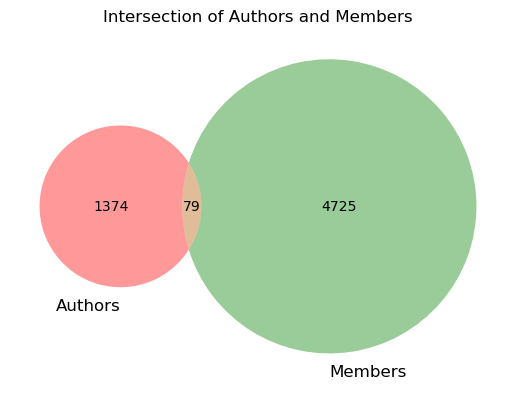

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Ensure sco_books_aut_unique and sco_members_aut are loaded
# For example purposes, I'm showing how you might load them if they're CSV files
# sco_books_aut_unique = pd.read_csv('path_to_sco_books_aut_unique.csv')
# sco_members_aut = pd.read_csv('path_to_sco_members_aut.csv')

# Check if the necessary columns exist
if 'sco_author' not in sco_books_aut_unique.columns:
    raise KeyError("Column 'sco_author' not found in sco_books_aut_unique")
if 'sort_name' not in sco_members_aut.columns:
    raise KeyError("Column 'sort_name' not found in sco_members_aut")

# Extract unique authors and members
unique_authors = set(sco_books_aut_unique['sco_author'])
unique_members = set(sco_members_aut['sort_name'])

# Calculate the intersection
intersection = len(unique_authors.intersection(unique_members))

# Calculate the percentages
percent_intersection_authors = (intersection / len(unique_authors)) * 100
percent_intersection_members = (intersection / len(unique_members)) * 100

print(f'Percent of the intersection relative to authors: {percent_intersection_authors:.2f}%')
print(f'Percent of the intersection relative to members: {percent_intersection_members:.2f}%')

# Create the Venn diagram for authors
venn2(subsets=(len(unique_authors) - intersection, len(unique_members) - intersection, intersection),
      set_labels=('Authors', 'Members'))
plt.title('Intersection of Authors and Members')
plt.show()
